In [1]:
# !pip install nbformat

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# !pip install graphviz
# !pip install dtreeviz

In [4]:
import numpy as np
import pandas as pd
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
import os
import gc
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [5]:
df_dos = pd.DataFrame(data=None)
for dirname, _, filenames in os.walk('../../Dataset/IDS 2018 Intrusion CSVs (CSE-CIC-IDS2018)/Remain/DoS/'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)
        df_temp = pd.read_csv(file_path)
        df_dos = pd.concat([df_dos, df_temp], ignore_index=True)
        del df_temp
        gc.collect()

../../Dataset/IDS 2018 Intrusion CSVs (CSE-CIC-IDS2018)/Remain/DoS/02-15-2018.csv
../../Dataset/IDS 2018 Intrusion CSVs (CSE-CIC-IDS2018)/Remain/DoS/02-16-2018.csv


In [6]:
df_dos.shape

(2097150, 80)

In [7]:
# check the number of rows and columns
print('Number of Rows (Samples): %s' % str((df_dos.shape[0])))
print('Number of Columns (Features): %s' % str((df_dos.shape[1])))

Number of Rows (Samples): 2097150
Number of Columns (Features): 80


In [8]:
df_dos.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.026633,56320579.0,704.278354,56321077,56320081,112641158,56320579.0,704.278354,56321077,56320081,0,0.0,0.0,0,0,0,0,0,0,0,0,0.026633,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320579.0,704.278354,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,154.857143,254.85527,976,0,249.416667,395.929392,138.1174,0.695806,1494670.48,3894923.821233,15617415,7,37366762,2874366.307692,5104444.019228,15617415,40,37366730,3396975.454545,5564223.872206,15936762,893,0,0,0,0,456,416,0.374665,0.321141,0,976,191.148148,320.122898,102478.669516,0,0,0,1,0,0,0,0,0,198.5,154.857143,249.416667,0,0,0,0,0,0,14,2168,12,2993,29200,232,8,32,1024353.0,649038.754495,1601183,321569,11431221.0,3644990.559845,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,32.0,45.254834,0,0,0.0,0.0,117863.720074,3683.241252,543.0,0.0,543,543,543,543.0,0.0,543,543,0,0.0,0.0,0,0,1,0,0,0,64,0,3683.241252,0.0,0,64,42.666667,36.950417,1365.333333,0,1,0,0,1,0,0,0,0,64.0,32.0,0.0,0,0,0,0,0,0,2,64,0,0,244,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.026633,56320351.5,366.988419,56320611,56320092,112640703,56320351.5,366.988419,56320611,56320092,0,0.0,0.0,0,0,0,0,0,0,0,0,0.026633,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320351.5,366.988419,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.026633,56320437.0,719.834703,56320946,56319928,112640874,56320437.0,719.834703,56320946,56319928,0,0.0,0.0,0,0,0,0,0,0,0,0,0.026633,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320437.0,719.834703,56320946,56319928,Benign


In [9]:
df_dos.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [10]:
df_dos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097150 entries, 0 to 2097149
Data columns (total 80 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Dst Port           object
 1   Protocol           object
 2   Timestamp          object
 3   Flow Duration      object
 4   Tot Fwd Pkts       object
 5   Tot Bwd Pkts       object
 6   TotLen Fwd Pkts    object
 7   TotLen Bwd Pkts    object
 8   Fwd Pkt Len Max    object
 9   Fwd Pkt Len Min    object
 10  Fwd Pkt Len Mean   object
 11  Fwd Pkt Len Std    object
 12  Bwd Pkt Len Max    object
 13  Bwd Pkt Len Min    object
 14  Bwd Pkt Len Mean   object
 15  Bwd Pkt Len Std    object
 16  Flow Byts/s        object
 17  Flow Pkts/s        object
 18  Flow IAT Mean      object
 19  Flow IAT Std       object
 20  Flow IAT Max       object
 21  Flow IAT Min       object
 22  Fwd IAT Tot        object
 23  Fwd IAT Mean       object
 24  Fwd IAT Std        object
 25  Fwd IAT Max        object
 26  Fwd IAT Min   

In [11]:
# check the number of values for labels
df_dos['Label'].value_counts()

Label
Benign                      1442849
DoS attacks-Hulk             461912
DoS attacks-SlowHTTPTest     139890
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
Label                             1
Name: count, dtype: int64

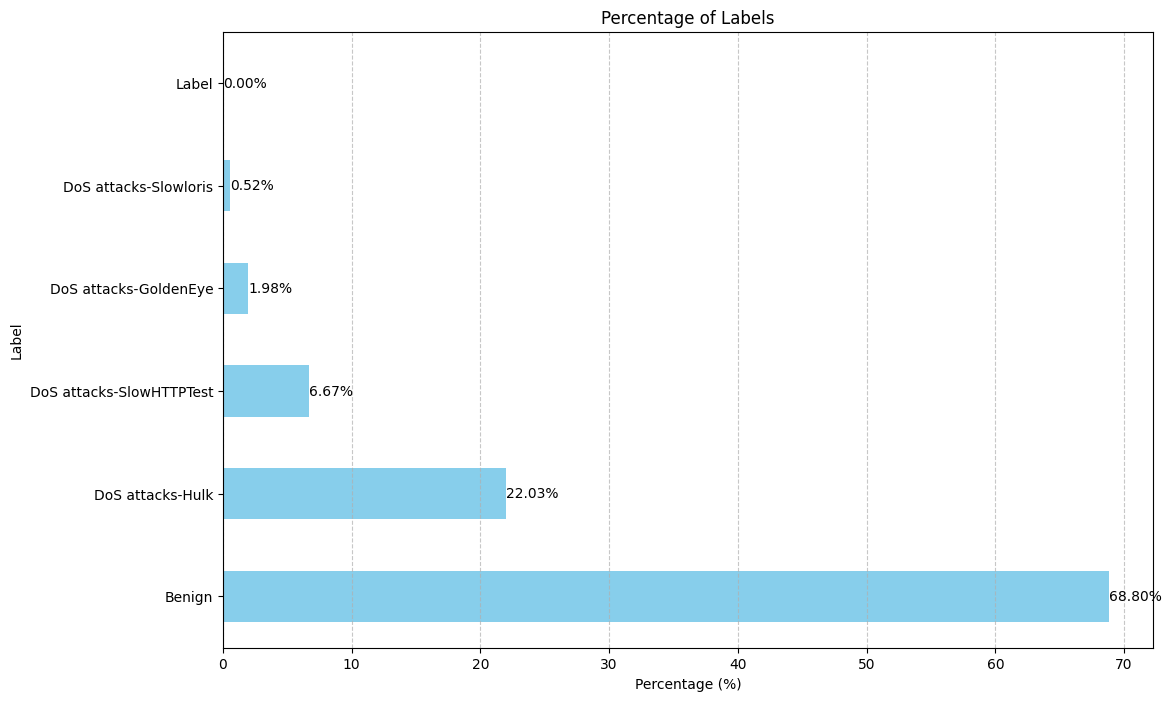

In [12]:
label_counts = df_dos['Label'].value_counts()

# Tính tỷ lệ phần trăm cho mỗi nhãn
label_percentages = (label_counts / label_counts.sum()) * 100

# Tạo biểu đồ cột ngang hiển thị phần trăm
plt.figure(figsize=(12, 8))
label_percentages.plot(kind='barh', color='skyblue')
plt.xlabel('Percentage (%)')
plt.ylabel('Label')
plt.title('Percentage of Labels')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Hiển thị giá trị phần trăm trên mỗi thanh của biểu đồ
for index, value in enumerate(label_percentages):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.show()

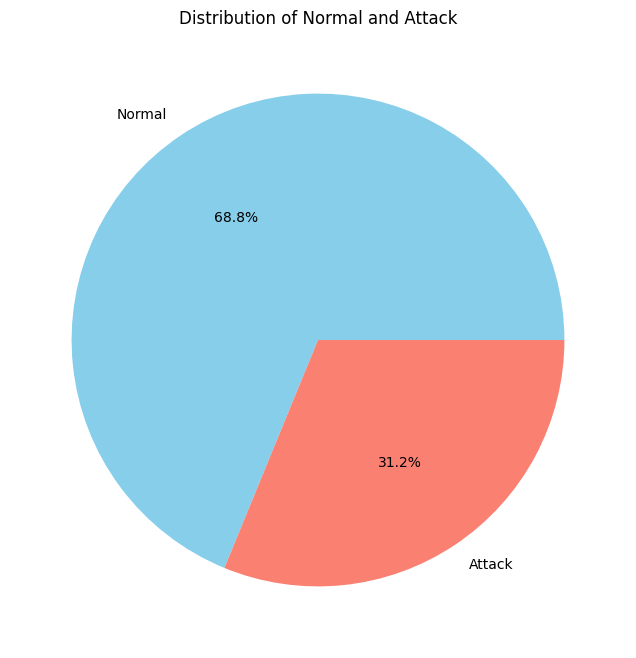

In [13]:
label_counts = df_dos['Label'].value_counts()

# Chuyển đổi các nhãn thành hai nhóm: "Normal" và "Attack"
label_groups = label_counts.copy()
label_groups['Normal'] = label_groups.pop('Benign')
label_groups['Attack'] = label_groups.sum() - label_groups['Normal']

# Tạo DataFrame cho biểu đồ tròn
pie_data = pd.Series({
    'Normal': label_groups['Normal'],
    'Attack': label_groups['Attack']
})

# Tính tỷ lệ phần trăm
pie_data_percentage = (pie_data / pie_data.sum()) * 100

# Tạo biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(pie_data_percentage, labels=pie_data_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribution of Normal and Attack')
plt.show()

In [14]:
# check the number of values for protocol
df_protocol = df_dos.copy()

# Chuyển đổi giá trị 'Protocol' sang kiểu chuỗi
df_protocol = df_protocol.astype({"Protocol": str})
df_protocol['Protocol'].value_counts()

Protocol
6           1732883
17           345539
0             18727
Protocol          1
Name: count, dtype: int64

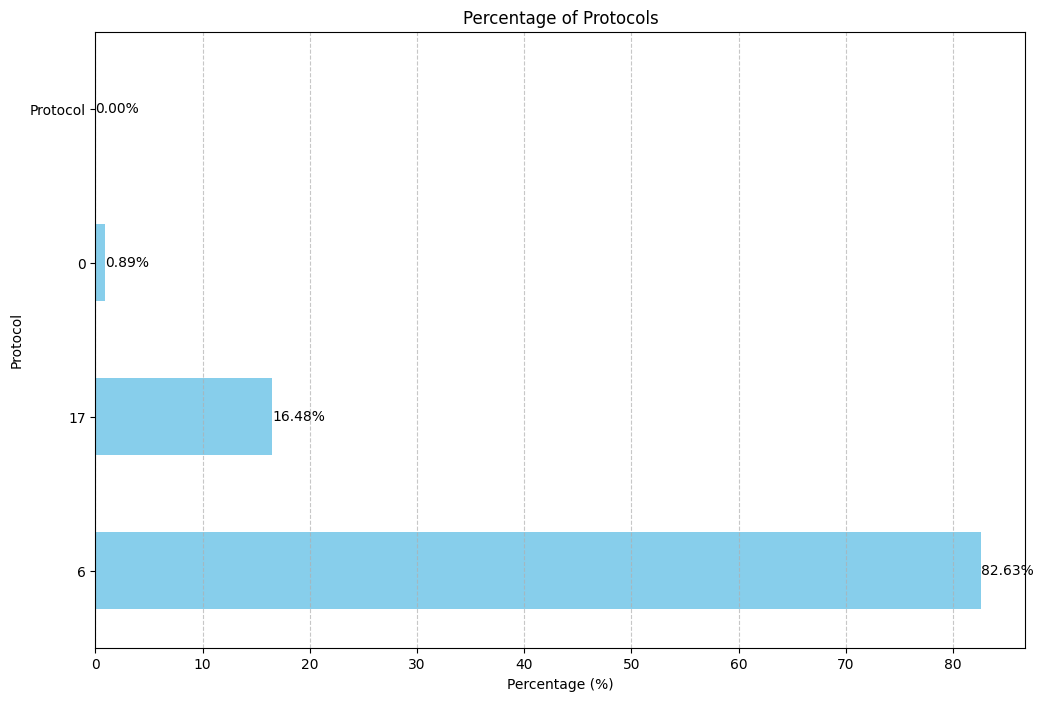

In [15]:
df_protocol = df_dos.copy()

# Chuyển đổi giá trị 'Protocol' sang kiểu chuỗi
df_protocol = df_protocol.astype({"Protocol": str})
protocol_counts = df_protocol['Protocol'].value_counts()

# Tính tỷ lệ phần trăm cho mỗi giao thức
protocol_percentages = (protocol_counts / protocol_counts.sum()) * 100

# Tạo biểu đồ cột ngang hiển thị phần trăm
plt.figure(figsize=(12, 8))
protocol_percentages.plot(kind='barh', color='skyblue')
plt.xlabel('Percentage (%)')
plt.ylabel('Protocol')
plt.title('Percentage of Protocols')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Hiển thị giá trị phần trăm trên mỗi thanh của biểu đồ
for index, value in enumerate(protocol_percentages):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.show()

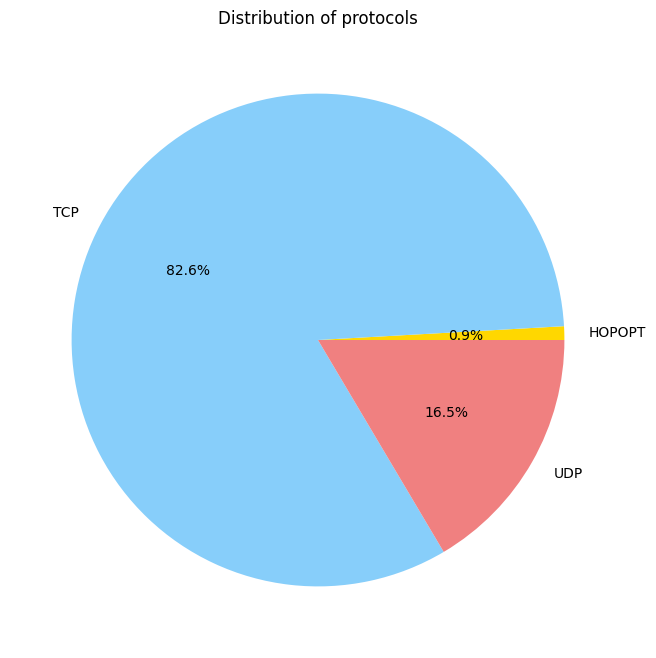

In [16]:
protocol_groups = protocol_counts.copy()
protocol_groups['HOPOPT'] = protocol_groups.pop('0')
protocol_groups['TCP'] = protocol_groups.pop('6')
protocol_groups['UDP'] = protocol_groups.pop('17')

# Tạo DataFrame cho biểu đồ tròn
pie_data = pd.Series({
    'HOPOPT': protocol_groups['HOPOPT'],
    'TCP': protocol_groups['TCP'],
    'UDP': protocol_groups['UDP']
})

# Tính tỷ lệ phần trăm
pie_data_percentage = (pie_data / pie_data.sum()) * 100

colors = ['gold', 'lightskyblue', 'lightcoral']

# Tạo biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(pie_data_percentage, labels=pie_data_percentage.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of protocols')
plt.show()

In [17]:
df_dos['Dst Port'].value_counts()

Dst Port
80       700698
53       333090
443      155851
21       132408
3389      74961
          ...  
54861         1
22428         1
13896         1
15385         1
64641         1
Name: count, Length: 29730, dtype: int64

In [18]:
df_dos.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150.000000,2097150.000000,2097150,2097150,2097150.000000,2097150.000000,2092229.000000,2097150.000000,2097150.000000,2097150.000000,2097150,2097150,2097150,2097150.000000,2097150.000000,2097150,2097150,2097150,2097150.000000,2097150.000000,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150.000000,2097150.000000,2097150,2097150,2097150.000000,2097150.000000,2097150.000000,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150.000000,2097150.000000,2097150.000000,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150,2097150.000000,2097150.000000,2097150,2097150,2097150.000000,2097150.000000,2097150,2097150,2097150
unique,29730,7,37040,882242,713,1206,7740,22913,1469,146,26037.000000,47795.000000,1294,290,39074.000000,48094.000000,1008884.000000,990885.000000,942762.000000,959871.000000,751834,144627,830684,860820.000000,837567.000000,748263,174561,493616,528227.000000,562519.000000,402629,144624,5,3,3,3,1392,2353,968985.000000,821289.000000,95,1373,58646.000000,74159.000000,74388.000000,4,5,5,5,5,5,3,5,53,57987.000000,26037.000000,39073.000000,3,3,3,3,3,3,713,7740,1206,22913,4513,5139,150,17,127743.000000,93217.000000,122395,71287,199579.000000,99496.000000,170853,179566,6
top,80,6,16/02/2018 01:45:28,2,2,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,1000000.000000,2.000000,0.000000,2,6,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,168,0,500000.000000,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,225,-1,0,32,0.000000,0.000000,0,0,0.000000,0.000000,0,0,Benign
freq,700698,1724736,8403,60170,643524,690070,852406,941030,852406,1737016,852406.000000,1201526.000000,941030,1747821,941030.000000,1279661.000000,847199.000000,60816.000000,60689.000000,1034958.000000,60129,120184,476746,476746.000000,1112570.000000,476746,489151,1207445,1207445.000000,1270926.000000,1207445,1269480,2035193,2088958,2088958,2088958,436370,691015,59331.000000,690176.000000,1742304,852120,852120.000000,864453.000000,864453.000000,2081539,2035193,2025007,1561231,1191891,2012428,2088958,2025009,1318305,852120.000000,852406.000000,941030.000000,2088958,2088958,2088958,2088958,2088958,2088958,643524,852406,690070,941030,446270,1025610,1153117,957997,1939683.000000,1994368.000000,1939683,1939683,1868497.000000,1980336.000000,1868497,1868497,1442849


In [19]:
# Danh sách đặc trưng cần giữ lại
features_to_keep = [
    'Bwd Pkt Len Min',
    'Subflow Fwd Byts',
    'TotLen Fwd Pkts',
    'Fwd Pkt Len Mean',
    'Bwd Pkt Len Std',
    'Flow IAT Min',
    'Fwd IAT Min',
    'Flow IAT Mean',
    'Flow Duration',
    'Flow IAT Std',
    'Active Min',
    'Active Mean',
    'Bwd IAT Mean',
    'Fwd IAT Mean',
    'Dst Port',
    'Protocol',
    'Tot Fwd Pkts',
    'Tot Bwd Pkts',
    'Label'
]

df_dos = df_dos[features_to_keep]

In [20]:
# Remove row with Label["Label"]
df_dos.drop(df_dos.loc[df_dos["Label"] == "Label"].index, inplace=True)

In [21]:
# Replace inf values to nan
df_dos = df_dos.replace([np.inf, -np.inf], np.nan)
# Count nan values
df_dos.isna().sum().sum()

0

In [22]:
# Drop nan values
df_dos.dropna(inplace=True)
df_dos.isna().sum().sum()

0

In [23]:
df_dos.shape

(2097149, 19)

In [24]:
# Drop duplicate values
df_dos.drop_duplicates(inplace=True)
df_dos.shape

(1448222, 19)

In [25]:
df_dos['Label'] = df_dos['Label'].apply(lambda x: 0 if x.startswith("Benign") else 1)
df_dos['Label'].value_counts()

Label
0    1251404
1     196818
Name: count, dtype: int64

In [26]:
def convert_to_numeric(df):
  """Converts all features (except label) from object to float64 or int64.
  Args:
      df: A pandas DataFrame.

  Returns:
      A DataFrame with features converted to float64 (if possible).
  """
  # Select all columns except the label column (assuming 'Label' is the name)
  numeric_cols = df.columns.difference(['Dst Port', 'Protocol', 'Label'])
  # Try converting each column to float, ignoring errors for non-numeric values
  for col in numeric_cols:
    try:
      df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
      pass
  return df

df_numeric = convert_to_numeric(df_dos.copy())
del df_dos
gc.collect()

6015

In [27]:
# Replace inf values to nan
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan)
# Count nan values
print(df_numeric.isna().sum().sum())
df_numeric.dropna(inplace=True)

0


In [28]:
# Drop constant columns
variances = df_numeric.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df_numeric.drop(constant_columns, axis=1, inplace=True)

print(constant_columns)
print(df_numeric.shape)

Index([], dtype='object')
(1448222, 19)


In [29]:
print(df_numeric.shape)
print(df_numeric['Label'].value_counts())

(1448222, 19)
Label
0    1251404
1     196818
Name: count, dtype: int64


In [30]:
# Process Protocol columns
df_numeric = df_numeric.astype({"Protocol": str})
df_numeric["Protocol"].unique()

array(['0', '6', '17'], dtype=object)

In [31]:
# Categorical data to onehot
df_numeric = pd.get_dummies(df_numeric, columns=['Protocol'])
df_numeric.head()

,Bwd Pkt Len Min,Subflow Fwd Byts,TotLen Fwd Pkts,Fwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Min,Fwd IAT Min,Flow IAT Mean,Flow Duration,Flow IAT Std,Active Min,Active Mean,Bwd IAT Mean,Fwd IAT Mean,Dst Port,Tot Fwd Pkts,Tot Bwd Pkts,Label,Protocol_0,Protocol_17,Protocol_6
0,0,0,0,0.000000,0.000000,56320081,56320081,56320579.00,112641158,7.042784e+02,0,0.0,0.000000e+00,5.632058e+07,0,3,0,0,True,False,False
1,0,2168,2168,154.857143,395.929392,7,40,1494670.48,37366762,3.894924e+06,321569,1024353.0,3.396975e+06,2.874366e+06,22,14,12,0,False,False,True
2,0,64,64,32.000000,0.000000,543,543,543.00,543,0.000000e+00,0,0.0,0.000000e+00,5.430000e+02,47514,2,0,0,False,False,True
3,0,0,0,0.000000,0.000000,56320092,56320092,56320351.50,112640703,3.669884e+02,0,0.0,0.000000e+00,5.632035e+07,0,3,0,0,True,False,False
4,0,0,0,0.000000,0.000000,56319928,56319928,56320437.00,112640874,7.198347e+02,0,0.0,0.000000e+00,5.632044e+07,0,3,0,0,True,False,False


In [32]:
gc.collect()

0

In [33]:
# making Label column the last column again
df_numeric.insert(len(df_numeric.columns)-1, 'Label', df_numeric.pop('Label'))

In [34]:
df_numeric.head()

,Bwd Pkt Len Min,Subflow Fwd Byts,TotLen Fwd Pkts,Fwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Min,Fwd IAT Min,Flow IAT Mean,Flow Duration,Flow IAT Std,Active Min,Active Mean,Bwd IAT Mean,Fwd IAT Mean,Dst Port,Tot Fwd Pkts,Tot Bwd Pkts,Protocol_0,Protocol_17,Protocol_6,Label
0,0,0,0,0.000000,0.000000,56320081,56320081,56320579.00,112641158,7.042784e+02,0,0.0,0.000000e+00,5.632058e+07,0,3,0,True,False,False,0
1,0,2168,2168,154.857143,395.929392,7,40,1494670.48,37366762,3.894924e+06,321569,1024353.0,3.396975e+06,2.874366e+06,22,14,12,False,False,True,0
2,0,64,64,32.000000,0.000000,543,543,543.00,543,0.000000e+00,0,0.0,0.000000e+00,5.430000e+02,47514,2,0,False,False,True,0
3,0,0,0,0.000000,0.000000,56320092,56320092,56320351.50,112640703,3.669884e+02,0,0.0,0.000000e+00,5.632035e+07,0,3,0,True,False,False,0
4,0,0,0,0.000000,0.000000,56319928,56319928,56320437.00,112640874,7.198347e+02,0,0.0,0.000000e+00,5.632044e+07,0,3,0,True,False,False,0


In [35]:
df_numeric = df_numeric.astype({"Protocol_0": 'int64', "Protocol_17": 'int64', "Protocol_6": 'int64'})
df_numeric.head()

,Bwd Pkt Len Min,Subflow Fwd Byts,TotLen Fwd Pkts,Fwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Min,Fwd IAT Min,Flow IAT Mean,Flow Duration,Flow IAT Std,Active Min,Active Mean,Bwd IAT Mean,Fwd IAT Mean,Dst Port,Tot Fwd Pkts,Tot Bwd Pkts,Protocol_0,Protocol_17,Protocol_6,Label
0,0,0,0,0.000000,0.000000,56320081,56320081,56320579.00,112641158,7.042784e+02,0,0.0,0.000000e+00,5.632058e+07,0,3,0,1,0,0,0
1,0,2168,2168,154.857143,395.929392,7,40,1494670.48,37366762,3.894924e+06,321569,1024353.0,3.396975e+06,2.874366e+06,22,14,12,0,0,1,0
2,0,64,64,32.000000,0.000000,543,543,543.00,543,0.000000e+00,0,0.0,0.000000e+00,5.430000e+02,47514,2,0,0,0,1,0
3,0,0,0,0.000000,0.000000,56320092,56320092,56320351.50,112640703,3.669884e+02,0,0.0,0.000000e+00,5.632035e+07,0,3,0,1,0,0,0
4,0,0,0,0.000000,0.000000,56319928,56319928,56320437.00,112640874,7.198347e+02,0,0.0,0.000000e+00,5.632044e+07,0,3,0,1,0,0,0


In [36]:
df_numeric = df_numeric.astype({"Dst Port": str})

In [37]:
df_numeric = df_numeric.astype({"Dst Port": 'int64'})
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1448222 entries, 0 to 2056064
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Bwd Pkt Len Min   1448222 non-null  int64  
 1   Subflow Fwd Byts  1448222 non-null  int64  
 2   TotLen Fwd Pkts   1448222 non-null  int64  
 3   Fwd Pkt Len Mean  1448222 non-null  float64
 4   Bwd Pkt Len Std   1448222 non-null  float64
 5   Flow IAT Min      1448222 non-null  int64  
 6   Fwd IAT Min       1448222 non-null  int64  
 7   Flow IAT Mean     1448222 non-null  float64
 8   Flow Duration     1448222 non-null  int64  
 9   Flow IAT Std      1448222 non-null  float64
 10  Active Min        1448222 non-null  int64  
 11  Active Mean       1448222 non-null  float64
 12  Bwd IAT Mean      1448222 non-null  float64
 13  Fwd IAT Mean      1448222 non-null  float64
 14  Dst Port          1448222 non-null  int64  
 15  Tot Fwd Pkts      1448222 non-null  int64  
 16  Tot B

In [38]:
len(df_numeric)

1448222

In [39]:
len(df_numeric[df_numeric['Label'] == 0])

1251404

In [40]:
len(df_numeric[df_numeric['Label'] == 1])

196818

In [41]:
df_normal = df_numeric[df_numeric['Label'] == 0]

In [42]:
df_attack = df_numeric[df_numeric['Label'] == 1]

In [43]:
df_normal_downsampled = resample(df_normal, replace=False, n_samples=len(df_attack), random_state=42)
len(df_normal_downsampled)

196818

In [44]:
df_downsample = pd.concat([df_normal_downsampled, df_attack])
len(df_downsample)

393636

In [45]:
len(df_downsample[df_downsample['Label'] == 0])

196818

In [46]:
len(df_downsample[df_downsample['Label'] == 1])

196818

In [47]:
df_downsample['Dst Port'].value_counts()

Dst Port
80       218508
53        37080
443       21276
3389      11868
445        8892
          ...  
58379         1
61767         1
24028         1
64100         1
59868         1
Name: count, Length: 19041, dtype: int64

In [48]:
df_downsample.to_csv('../../Dataset/IDS 2018 Intrusion CSVs (CSE-CIC-IDS2018)/dataset_dos.csv', index=False)